## Smart healtcare framework for machine learning & intertpretable prediction of ssi

In [1]:
# pip install pandas pandasgui matplotlib seaborn sci-kit-learn # Make sure you run this cell before the rest, and restart kernel 

In [2]:
# Import neccessary tools for dataset normalization

import pandas as pd
from pandasgui import show
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1 = pd.read_csv("Data.CSV") # Load dataset from csv file

C:\Users\MADTech\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (39,50,51,52,73,74,75,76,77,78,79,80) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df1['SSI_EVENT'].value_counts()

no     37014
yes     1787
Name: SSI_EVENT, dtype: int64

In [4]:
df1

,REGIONS_NAME,RS_NAME,PROCEDURE_NAME,"TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')",ENCOUNTER_ID,SUBJECT_ID,ORGANIZATIONAL_UNIT_ID,SDL_ID,FORM_INSTANCE_ID,LANGUAGE_SHORT_DESC,CREATED_BY,CREATED_ON,LOCATION,PROCEDURE_DATE,PROCEDURE_NAME_1,SURVEILLANCE_PERIOD,CSEC_DURATION,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,SURGEON_ID,HOSPITAL_ADMISSION_DATE,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,CORE_TEMPERATURE,SERUM_GLUCOSE_LEVEL_DAY1,SERUM_GLUCOSE_DAY1,UNIT1,SERUM_GLUCOSE_LEVEL_DAY2,SERUM_GLUCOSE_DAY2,UNIT2,COMMENTS,MULTIPLE_PROCEDURES,MULTIPLEPROCEDURES_YES_SPECIFY,LAPAROSCOPE_ENDOSCOPE,CLOSURE_TECHNIQUE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,EVENT_DATE,DETECTED,PATOS,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER,LABORATORY,CLINICAL_DIAGNOSIS,SSI_CATEGORY,ORGANSPACE_SPECIFY,POST_PROCEDURE_BSI,HOSPITALIZATION_DEATH,DEATH_DATE,SSI_CONTRIBUTED_DEATH,Unnamed: 81,Unnamed: 82,Infants and child,Adult
0,RR,KS-MCR,CSEC,2021,6,June,"23,168,920","16,193,407","1,652","2,150","2,833,894",en,ephs.nalhamaid,50:54.8,no,00:00.0,CSEC,thirty,NaN,Yes,PET,777,00:00.0,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,57,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
1,RR,KS-MCR,CSEC,2021,3,March,"19,275,319","13,778,708","1,652","2,150","2,650,373",en,ephs.emahinay,48:46.1,no,00:00.0,CSEC,thirty,NaN,Yes,"TERM, BIG BABY",77,00:00.0,155,104,43.290000,No,Yes,Yes,Yes,No,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,58,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
2,RR,KS-MCR,CSEC,2021,3,March,"19,105,890","13,778,495","1,652","2,150","2,639,924",en,ephs.emahinay,50:26.5,no,00:00.0,CSEC,thirty,NaN,Yes,previous cs,77,00:00.0,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,126,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
3,RR,KS-MCR,CSEC,2021,6,June,"22,590,826","15,893,351","1,652","2,150","2,816,402",en,ephs.nalhamaid,03:08.4,no,00:00.0,CSEC,thirty,NaN,Yes,BREECH,777,00:00.0,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,Yes,2,44,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
4,RR,KS-MCR,CSEC,2021,6,June,"23,168,440","16,192,999","1,652","2,150","2,833,877",en,ephs.nalhamaid,42:48.1,no,00:00.0,CSEC,thirty,NaN,Yes,PREVIOUS 4 C/S,777,00:00.0,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,164,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,JZR,Smt,XLAP,2018,8,August,"1,461,201","2,655,399",858,"1,007","1,036,577",en,ephs.aashry,33:19.3,no,00:00.0,XLAP,NaN,NaN,Yes,gunshot Abdomen,Dr. Ahmed AL Hadrani,00:00.0,120,30,20.833333,No,NaN,Yes,Yes,No,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,Yes,1_Clean,Yes,5,125,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Droping irrelevant columns

df1.drop([
    'REGIONS_NAME', 'RS_NAME', 'PROCEDURE_NAME_1', 'LANGUAGE_SHORT_DESC', 'ORGANIZATIONAL_UNIT_ID',
    'FORM_INSTANCE_ID', 'ENCOUNTER_ID', 'SUBJECT_ID', 'SDL_ID', 'CREATED_BY', 'SURGEON_ID',
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')", "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')", 'PROCEDURE_DATE', 'CREATED_ON', 'HOSPITAL_ADMISSION_DATE',
    "Infants and child"
], axis=1, inplace=True)

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,CSEC_DURATION,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,CORE_TEMPERATURE,SERUM_GLUCOSE_LEVEL_DAY1,SERUM_GLUCOSE_DAY1,UNIT1,SERUM_GLUCOSE_LEVEL_DAY2,SERUM_GLUCOSE_DAY2,UNIT2,COMMENTS,MULTIPLE_PROCEDURES,MULTIPLEPROCEDURES_YES_SPECIFY,LAPAROSCOPE_ENDOSCOPE,CLOSURE_TECHNIQUE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,EVENT_DATE,DETECTED,PATOS,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER,LABORATORY,CLINICAL_DIAGNOSIS,SSI_CATEGORY,ORGANSPACE_SPECIFY,POST_PROCEDURE_BSI,HOSPITALIZATION_DEATH,DEATH_DATE,SSI_CONTRIBUTED_DEATH,Unnamed: 81,Unnamed: 82,Adult
0,CSEC,no,thirty,NaN,Yes,PET,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,57,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
1,CSEC,no,thirty,NaN,Yes,"TERM, BIG BABY",155,104,43.290000,No,Yes,Yes,Yes,No,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,58,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
2,CSEC,no,thirty,NaN,Yes,previous cs,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,126,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,CSEC,no,thirty,NaN,Yes,BREECH,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,Yes,2,44,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
4,CSEC,no,thirty,NaN,Yes,PREVIOUS 4 C/S,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,1_Clean,No,2,164,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,NaN,NaN,Yes,gunshot Abdomen,120,30,20.833333,No,NaN,Yes,Yes,No,ND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,Yes,1_Clean,Yes,5,125,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38797,XLAP,no,NaN,NaN,Yes,FT With Omphalocele,52,4,14.792899,No,No,Yes,Yes,No,Yes,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,primary,No,1_Clean,Yes,5,122,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38798,SB,no,NaN,NaN,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,39,2,13.149244,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,No,NaN,No,4_Dirty_Infected,Yes,5,65,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
38799,THOR,no,NaN,NaN,Yes,Gun shot wound right lung laceration,39,2,13.149244,Yes,Yes,Yes,Yes,Yes,Yes,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Yes,NaN,Yes,2_Clean_Contaminated,Yes,5,205,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False


In [6]:
df1.isnull().sum() / df1.shape[0]

PROCEDURE_NAME           0.000000
LOCATION                 0.000000
SURVEILLANCE_PERIOD      0.012474
CSEC_DURATION            0.994253
EMERGENCY                0.000000
                           ...   
DEATH_DATE               0.999381
SSI_CONTRIBUTED_DEATH    0.999381
Unnamed: 81              1.000000
Unnamed: 82              1.000000
  Adult                  0.000000
Length: 67, dtype: float64

In [7]:
df1.dtypes

PROCEDURE_NAME            object
LOCATION                  object
SURVEILLANCE_PERIOD       object
CSEC_DURATION            float64
EMERGENCY                 object
                          ...   
DEATH_DATE                object
SSI_CONTRIBUTED_DEATH     object
Unnamed: 81              float64
Unnamed: 82              float64
  Adult                     bool
Length: 67, dtype: object

In [8]:
# After noticing some of the columns have almost all it value to be NAN
# We have decided to drop all of such columns because it is assumed that we do not have data for such columns

df1.isnull().sum() / df1.shape[0] # Returns the percentage of NAN is each column

n = df1.shape[0] // 2 # Taking half of the amount of the entire dataset

# For a column to remain in the dataset, it is advicable that more than half of it values most not be empty

df1.dropna(axis=1, thresh=n, inplace=True)  # Droping columns with over half of it values as NAN
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45.370000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,"TERM, BIG BABY",155,104,43.290000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40.370000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39.540000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 C/S,155,90,37.460000,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,NaN,Yes,gunshot Abdomen,120,30,20.833333,No,NaN,Yes,Yes,No,ND,No,No,Yes,1_Clean,Yes,5,125,no,False
38797,XLAP,no,NaN,Yes,FT With Omphalocele,52,4,14.792899,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,122,no,False
38798,SB,no,NaN,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,39,2,13.149244,Yes,NaN,NaN,NaN,NaN,NaN,No,No,No,4_Dirty_Infected,Yes,5,65,no,False
38799,THOR,no,NaN,Yes,Gun shot wound right lung laceration,39,2,13.149244,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,205,no,False


## Normalizing the dataset

In [9]:
df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].str.replace('[\,/,]', '', regex=True)
# Column PRE_PROCEDURE_DIAGNOSIS normalized

In [10]:
df1['BMI'] = df1['BMI'].astype(int)
df1['BMI']

0        45
1        43
2        40
3        39
4        37
         ..
38796    20
38797    14
38798    13
38799    13
38800    27
Name: BMI, Length: 38801, dtype: int32

In [11]:
# show(df1)

In [12]:
# show(df1[df1['SSI_EVENT'] == 'yes'])
# show(df1[df1['SSI_EVENT'] == 'no'])

## Handling missing values

In [13]:
df1.isnull().sum()

PROCEDURE_NAME                     0
LOCATION                           0
SURVEILLANCE_PERIOD              484
EMERGENCY                          0
PRE_PROCEDURE_DIAGNOSIS            1
HEIGHT                             0
WEIGHT                             0
BMI                                0
OVERALL_COMPLIANCE                 0
HAIR_CLIPPED                    5234
ANTIBIOTIC_BEFORE_SURGICAL      1133
PROPHYLACTIC_ANTIBIOTIC         1683
DISCONTINUATION_PROPHYLACTIC    1350
TEMPERATURE_NORMAL               264
MULTIPLE_PROCEDURES                0
LAPAROSCOPE_ENDOSCOPE              0
TRAUMA                             0
WOUND_CLASS                        0
GENERAL_ANESTHESIA                 0
ASA_SCORE                          0
PROCEDURE_DURATION                 0
SSI_EVENT                          0
  Adult                            0
dtype: int64

In [14]:
# Handling missing values for SURVEILLANCE_PERIOD column

sp_mod = df1['SURVEILLANCE_PERIOD'].mode()[0]  # Taking the mode of the column

df1['SURVEILLANCE_PERIOD'] = df1['SURVEILLANCE_PERIOD'].fillna(value=sp_mod)  # Filling the missing values with the mode

df1['SURVEILLANCE_PERIOD'].isnull().sum()

# df1.loc[df2['SURVEILLANCE_PERIOD'] == df1['SURVEILLANCE_PERIOD'].mode()[0], ['SURVEILLANCE_PERIOD', 'SSI_EVENT']]


0

In [15]:
# Handling missing values for PRE_PROCEDURE_DIAGNOSIS column

ppd_mod = df1['PRE_PROCEDURE_DIAGNOSIS'].mode()[0]

df1.loc[df1['PRE_PROCEDURE_DIAGNOSIS'] == ppd_mod, ['PRE_PROCEDURE_DIAGNOSIS', 'SSI_EVENT']]

df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].fillna(value=ppd_mod)

df1['PRE_PROCEDURE_DIAGNOSIS'].isnull().sum()

0

In [16]:
# Handling missing values for HAIR_CLIPPED column

hc_mod = df1['HAIR_CLIPPED'].mode()[0]

df1.loc[df1['HAIR_CLIPPED'] == hc_mod, ['HAIR_CLIPPED', 'SSI_EVENT']]

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].fillna(value=hc_mod)

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].apply(lambda x: x if x != 'ND' else hc_mod)

df1['HAIR_CLIPPED'].isnull().sum()

0

In [17]:
# Handling missing values for ANTIBIOTIC_BEFORE_SURGICAL column

abs_mod = df1['ANTIBIOTIC_BEFORE_SURGICAL'].mode()[0]

df1.loc[df1['ANTIBIOTIC_BEFORE_SURGICAL'] == abs_mod, ['ANTIBIOTIC_BEFORE_SURGICAL', 'SSI_EVENT']]

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].fillna(value=abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].apply(lambda x: x if x != 'ND' else abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'].isnull().sum()

0

In [18]:
# Handling missing values for PROPHYLACTIC_ANTIBIOTIC column

pa_mod = df1['PROPHYLACTIC_ANTIBIOTIC'].mode()[0]

df1.loc[df1['PROPHYLACTIC_ANTIBIOTIC'] == pa_mod, ['PROPHYLACTIC_ANTIBIOTIC', 'SSI_EVENT']]

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].fillna(value=pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].apply(lambda x: x if x != 'ND' else pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'].isnull().sum()

0

In [19]:
# Handling missing values for DISCONTINUATION_PROPHYLACTIC column

dp_mod = df1['DISCONTINUATION_PROPHYLACTIC'].mode()[0]

df1.loc[df1['DISCONTINUATION_PROPHYLACTIC'] == dp_mod, ['DISCONTINUATION_PROPHYLACTIC', 'SSI_EVENT']]

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].fillna(value=dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].apply(lambda x: x if x != 'ND' else dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'].isnull().sum()

0

In [20]:
# Handling missing values for TEMPERATURE_NORMAL column

tn_mod = df1['TEMPERATURE_NORMAL'].mode()[0]

df1.loc[df1['TEMPERATURE_NORMAL'] == tn_mod, ['TEMPERATURE_NORMAL', 'SSI_EVENT']]

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].fillna(value=tn_mod)

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].apply(lambda x: x if x != 'ND' else tn_mod)

df1['TEMPERATURE_NORMAL'].isnull().sum()

0

In [21]:
mp_mod = df1['MULTIPLE_PROCEDURES'].mode()[0]

df1['MULTIPLE_PROCEDURES'] = df1['MULTIPLE_PROCEDURES'].apply(lambda x: x if x != 'unknown' else mp_mod)

In [22]:
df1.isnull().sum()

PROCEDURE_NAME                  0
LOCATION                        0
SURVEILLANCE_PERIOD             0
EMERGENCY                       0
PRE_PROCEDURE_DIAGNOSIS         0
HEIGHT                          0
WEIGHT                          0
BMI                             0
OVERALL_COMPLIANCE              0
HAIR_CLIPPED                    0
ANTIBIOTIC_BEFORE_SURGICAL      0
PROPHYLACTIC_ANTIBIOTIC         0
DISCONTINUATION_PROPHYLACTIC    0
TEMPERATURE_NORMAL              0
MULTIPLE_PROCEDURES             0
LAPAROSCOPE_ENDOSCOPE           0
TRAUMA                          0
WOUND_CLASS                     0
GENERAL_ANESTHESIA              0
ASA_SCORE                       0
PROCEDURE_DURATION              0
SSI_EVENT                       0
  Adult                         0
dtype: int64

In [23]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}")

PROCEDURE_NAME - 33
LOCATION - 2
SURVEILLANCE_PERIOD - 2
EMERGENCY - 2
PRE_PROCEDURE_DIAGNOSIS - 20527
HEIGHT - 154
WEIGHT - 174
BMI - 90
OVERALL_COMPLIANCE - 2
HAIR_CLIPPED - 2
ANTIBIOTIC_BEFORE_SURGICAL - 2
PROPHYLACTIC_ANTIBIOTIC - 2
DISCONTINUATION_PROPHYLACTIC - 2
TEMPERATURE_NORMAL - 2
MULTIPLE_PROCEDURES - 2
LAPAROSCOPE_ENDOSCOPE - 2
TRAUMA - 2
WOUND_CLASS - 4
GENERAL_ANESTHESIA - 2
ASA_SCORE - 5
PROCEDURE_DURATION - 404
SSI_EVENT - 2
  Adult  - 2


In [24]:
# show(df1)

## ANOMALY DETECTION AND HANDLING

In [25]:
# IQR Function to detect outlier

def anom_det(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bottom = np.percentile(data, 25) - 1.5 * iqr
    top = np.percentile(data, 75) + 1.5 * iqr
    return bottom, top

In [26]:
# Handling anomaly(outlier) for HEIGHT

h_bottom, h_top = anom_det(df1['HEIGHT'])

# df1.drop(df1.loc[((df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top), ['HEIGHT']] = df1['HEIGHT'].median()
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,155,90,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,thirty,Yes,gunshot Abdomen,158,30,20,No,Yes,Yes,Yes,No,Yes,No,No,Yes,1_Clean,Yes,5,125,no,False
38797,XLAP,no,thirty,Yes,FT With Omphalocele,158,4,14,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,122,no,False
38798,SB,no,thirty,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,158,2,13,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,4_Dirty_Infected,Yes,5,65,no,False
38799,THOR,no,thirty,Yes,Gun shot wound right lung laceration,158,2,13,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,205,no,False


In [27]:
# Handling anomaly (outlier) for WEIGHT

w_bottom, w_top = anom_det(df1['WEIGHT'])

# df1.drop(df1.loc[((df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top), ['WEIGHT']] = df1['WEIGHT'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,126,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,155,90,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,164,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,thirty,Yes,gunshot Abdomen,158,73,20,No,Yes,Yes,Yes,No,Yes,No,No,Yes,1_Clean,Yes,5,125,no,False
38797,XLAP,no,thirty,Yes,FT With Omphalocele,158,73,14,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,122,no,False
38798,SB,no,thirty,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,158,73,13,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,4_Dirty_Infected,Yes,5,65,no,False
38799,THOR,no,thirty,Yes,Gun shot wound right lung laceration,158,73,13,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,205,no,False


In [28]:
# # Analyzing PROCEDURE_DURATION column

pd_bottom, pd_top = anom_det(df1['PROCEDURE_DURATION'])

# df1.drop(df1.loc[((df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top), ['PROCEDURE_DURATION']] = df1['PROCEDURE_DURATION'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,155,109,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,57,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,155,104,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,58,no,True
2,CSEC,no,thirty,Yes,previous cs,155,97,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,46,no,True
3,CSEC,no,thirty,Yes,BREECH,155,95,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,44,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,155,90,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,46,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,thirty,Yes,gunshot Abdomen,158,73,20,No,Yes,Yes,Yes,No,Yes,No,No,Yes,1_Clean,Yes,5,46,no,False
38797,XLAP,no,thirty,Yes,FT With Omphalocele,158,73,14,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,46,no,False
38798,SB,no,thirty,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,158,73,13,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,4_Dirty_Infected,Yes,5,65,no,False
38799,THOR,no,thirty,Yes,Gun shot wound right lung laceration,158,73,13,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,46,no,False


In [29]:
# Function to categorize HEIGHT and WEIGHT

def categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 50:
            category.append(0)
        elif i <= 100:
            category.append(1)
        elif i <= 150:
            category.append(2)
        elif i <= 200:
            category.append(3)
        else:
            category.append(4)
    return category

# Function to categorize PROCEDURE_DURATION

def p_categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 60:
            category.append(0)
        elif i <= 120:
            category.append(1)
        elif i <= 180:
            category.append(2)
        elif i <= 240:
            category.append(3)
        elif i <= 300:
            category.append(4)
        elif i <= 360:
            category.append(5)
        else:
            category.append(6)
    return category

In [30]:
# Setting categories for HEIGHT and WEIGHT

df1['HEIGHT'] = categorize(df1['HEIGHT'])

df1['WEIGHT'] = categorize(df1['WEIGHT'])

df1['PROCEDURE_DURATION'] = p_categorize(df1['PROCEDURE_DURATION'])

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult
0,CSEC,no,thirty,Yes,PET,3,2,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
1,CSEC,no,thirty,Yes,TERM BIG BABY,3,2,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
2,CSEC,no,thirty,Yes,previous cs,3,1,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
3,CSEC,no,thirty,Yes,BREECH,3,1,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,0,no,True
4,CSEC,no,thirty,Yes,PREVIOUS 4 CS,3,1,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,thirty,Yes,gunshot Abdomen,3,1,20,No,Yes,Yes,Yes,No,Yes,No,No,Yes,1_Clean,Yes,5,0,no,False
38797,XLAP,no,thirty,Yes,FT With Omphalocele,3,1,14,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,0,no,False
38798,SB,no,thirty,Yes,POST ILEAL ANASTOMOSIS LEAKAGE,3,1,13,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,4_Dirty_Infected,Yes,5,1,no,False
38799,THOR,no,thirty,Yes,Gun shot wound right lung laceration,3,1,13,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,0,no,False


In [31]:
df1.reset_index(inplace=True)
df1.drop(['index'], inplace=True, axis=1)

In [32]:
# show(df1)

In [33]:
# Increasing dimentionality from PRE_PROCEDURE_DIAGNOSIS column and droping duplicates

df1['CANCER_FEVER_or_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(
    lambda x: 'yes' if ('canc' in x.lower()) or ('feve' in x.lower()) or ('diab' in x.lower()) else 'no'
)

# df1['HAS_CANCER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'cancer' in x.lower() else 'no')

# df1['HAS_FEVER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'fever' in x.lower() else 'no')

# df1['HAS_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'diabet' in x.lower() else 'no')

# df1.reset_index(inplace=True)

df = df1.drop(['PRE_PROCEDURE_DIAGNOSIS'], axis=1)

# df.drop_duplicates(keep='first', inplace=True) # Droping duplicate data to avoid overfiting

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,CSEC,no,thirty,Yes,3,2,45,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
1,CSEC,no,thirty,Yes,3,2,43,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
2,CSEC,no,thirty,Yes,3,1,40,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
3,CSEC,no,thirty,Yes,3,1,39,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,2,0,no,True,no
4,CSEC,no,thirty,Yes,3,1,37,No,Yes,Yes,Yes,No,Yes,No,No,No,1_Clean,No,2,0,no,True,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,XLAP,no,thirty,Yes,3,1,20,No,Yes,Yes,Yes,No,Yes,No,No,Yes,1_Clean,Yes,5,0,no,False,no
38797,XLAP,no,thirty,Yes,3,1,14,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,5,0,no,False,no
38798,SB,no,thirty,Yes,3,1,13,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,4_Dirty_Infected,Yes,5,1,no,False,no
38799,THOR,no,thirty,Yes,3,1,13,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,2_Clean_Contaminated,Yes,5,0,no,False,no


In [34]:
df['SSI_EVENT'].value_counts()

no     37014
yes     1787
Name: SSI_EVENT, dtype: int64

In [35]:
# show(df)

## CHANGING COLUMNS TO NUMERIC

In [36]:
# function to creat dummies (numeric values) for dataset

def dummyrize(x):
    dummies = []
    unique_list = list(x.unique())
    values_list = list(x.values)
    if unique_list == ['yes', 'no']:
        unique_list = ['no', 'yes']
    for i in values_list:
        dummies.append(unique_list.index(i))
    return dummies

In [37]:
# Change affected columns

nw = ['PROCEDURE_DURATION', 'ASA_SCORE', 'WEIGHT', 'HEIGHT', 'BMI']
columns_list = df.columns
for i in columns_list:
    if i not in nw:
        df[i] = dummyrize(df[i])

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,40,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
4,0,0,0,0,3,1,37,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38796,1,0,0,0,3,1,20,0,0,0,0,0,0,0,0,1,0,1,5,0,0,1,0
38797,1,0,0,0,3,1,14,0,1,0,0,0,0,0,0,0,0,1,5,0,0,1,0
38798,24,0,0,0,3,1,13,1,0,0,0,1,0,0,0,0,3,1,5,1,0,1,0
38799,31,0,0,0,3,1,13,1,0,0,0,1,0,0,1,1,1,1,5,0,0,1,0


In [38]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
count,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000,38801.000000
mean,0.792428,0.063117,0.058787,0.412773,2.905260,1.023556,28.856241,0.685678,0.064612,0.045050,0.045257,0.847710,0.012809,0.014458,0.077910,0.042654,0.507049,0.378160,1.437643,0.114198,0.046056,0.066003,0.000850
std,2.070523,0.243176,0.235229,0.492339,0.292859,0.247590,19.819068,0.464251,0.245843,0.207417,0.207869,0.359306,0.112451,0.119372,0.268034,0.202077,0.538859,0.484934,0.633827,0.318056,0.209608,0.248291,0.029151
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,29.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,33.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,32.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3491.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


## DATASET CLASS BALANCING BY OVERSAMPLING METHOD

In [39]:
yes_df = df[df['SSI_EVENT'] == 1]  # getting the amount of 'yes' class available in the dataset

no_df = df[df['SSI_EVENT'] == 0]  # getting the amount of 'no' class available in the dataset

n = (100 * no_df.shape[0]) // 50  # specifying 50% of 'no' class to the resulting dataset

m = (n - no_df.shape[0]) // yes_df.shape[0]  # Number of time to append the new dataset with 'yes' class

data = df[df['SSI_EVENT'] == 0]

# Increase the dataset by more of 'yes' class
for i in range(m):
    data = pd.concat([data, yes_df], ignore_index=True)

data

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,BMI,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,Adult,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,2,45,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
1,0,0,0,0,3,2,43,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
2,0,0,0,0,3,1,40,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
3,0,0,0,0,3,1,39,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0
4,0,0,0,0,3,1,37,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72749,0,0,0,0,2,0,21,0,0,1,1,0,0,0,0,0,1,1,1,0,1,0,0
72750,0,0,0,0,3,0,17,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
72751,1,0,0,0,3,0,18,1,0,0,0,1,0,0,0,0,1,1,2,0,1,0,1
72752,1,0,0,0,3,1,27,0,0,0,1,0,0,0,0,0,0,1,4,0,1,0,0


In [40]:
# data.to_csv('over_data.csv')

## FEATURE SELECTION USING FILTER METHOD

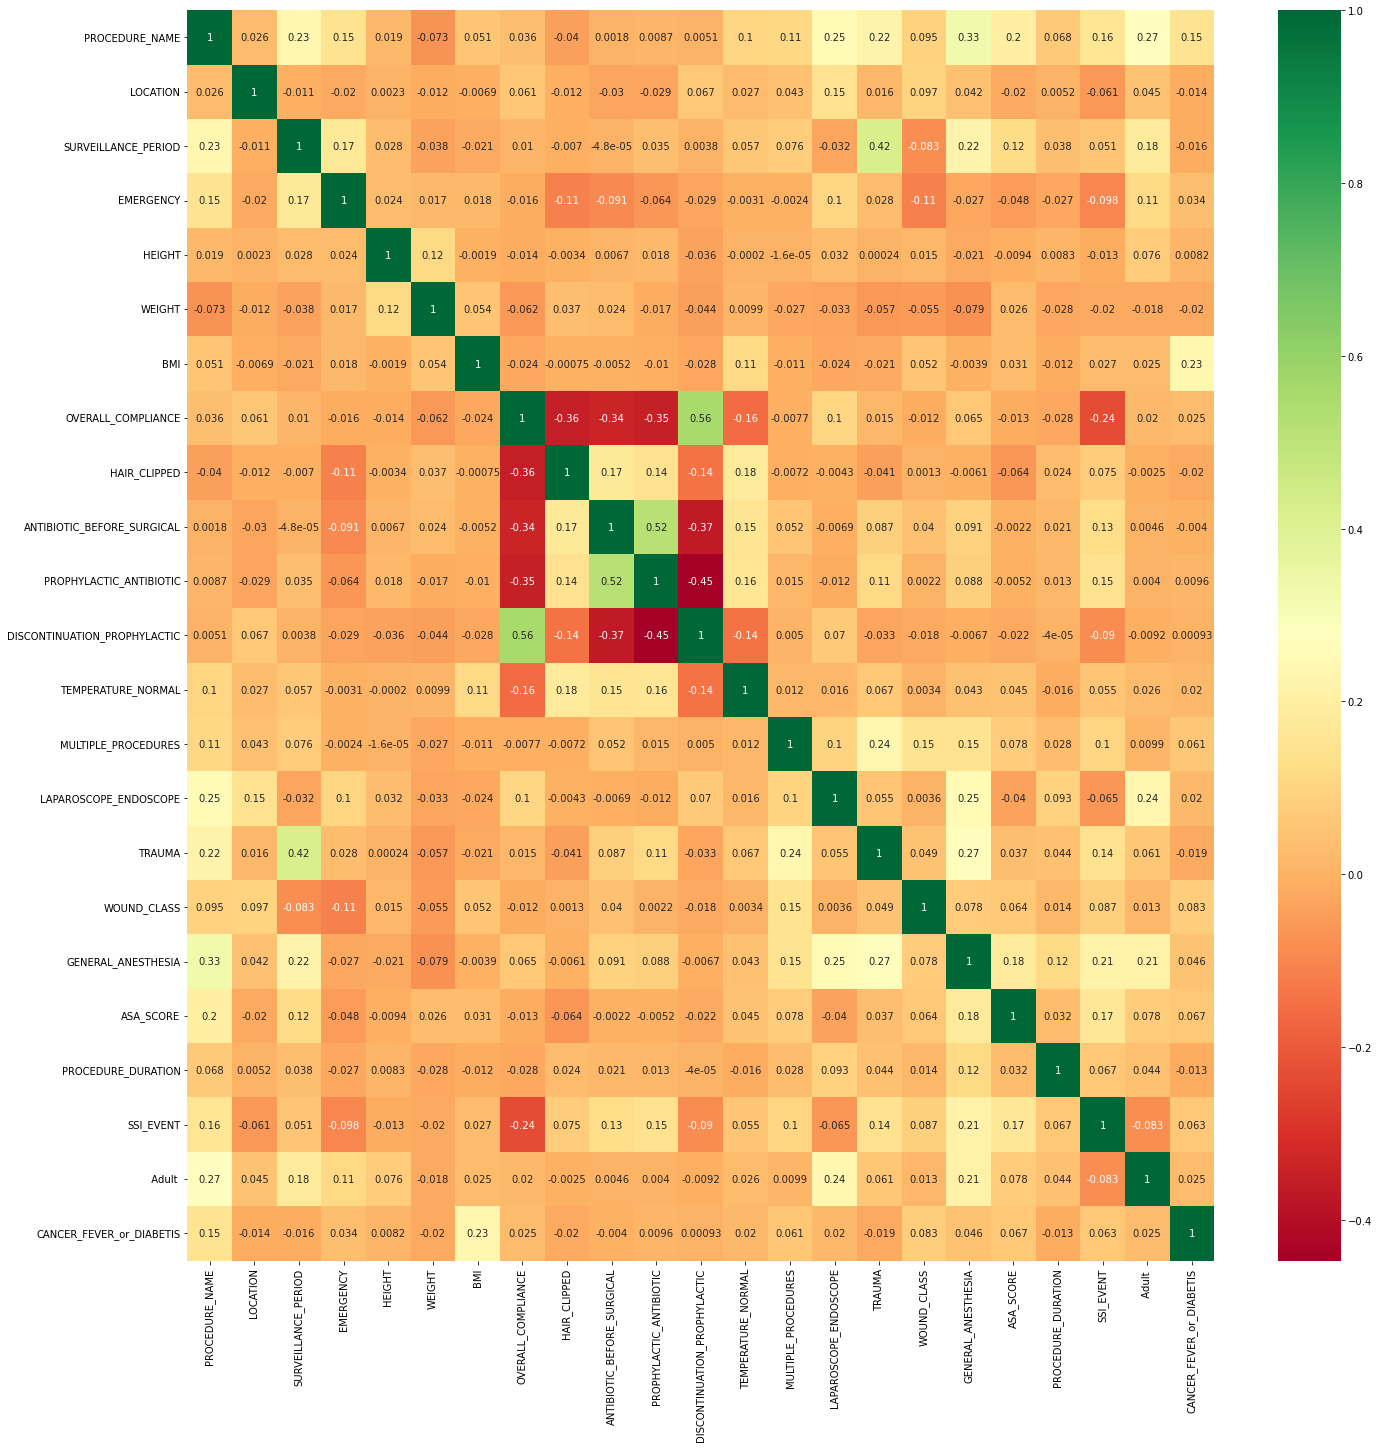

In [41]:
df_corr = data.corr()
t_corr = df_corr.index
plt.figure(figsize=(data.shape[1], data.shape[1]))
graph = sns.heatmap(data[t_corr].corr(), annot=True, cmap='RdYlGn')

In [42]:
x = data.drop(['SSI_EVENT'], axis=1)
y = data['SSI_EVENT']

In [43]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# define feature selection
fs = SelectKBest(score_func=f_classif, k=8)
# apply feature selection
X_selected = fs.fit_transform(x, y)
print(X_selected.shape)

(72754, 8)


## Truncated Singular Value Decomposition (SVD)

['truncatedsvd0' 'truncatedsvd1' 'truncatedsvd2' 'truncatedsvd3'
 'truncatedsvd4' 'truncatedsvd5' 'truncatedsvd6' 'truncatedsvd7']


C:\Users\MADTech\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


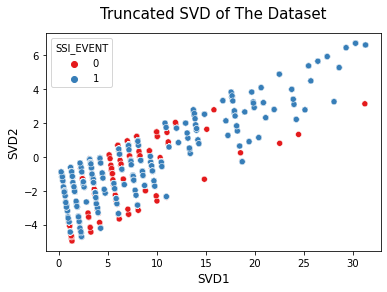

In [44]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=X_selected.shape[1], algorithm='randomized', random_state=0)

svd_data = svd.fit_transform(X_selected)

names = svd.get_feature_names_out()
print(names)

# fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(13.5 ,4))

sns.scatterplot(svd_data[:, 0], svd_data[:, 1], hue=y, palette='Set1')
plt.title("Truncated SVD of The Dataset", fontsize=15, pad=15)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)
plt.show()

In [45]:
svd_df = pd.DataFrame(data=svd_data, columns=names)

In [46]:
# Split dataset into test and train
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(svd_df, y, test_size=0.30, random_state=5)

## Modelling

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [48]:
sgd = SGDClassifier(loss="log_loss")
sgd.fit(X_train, y_train)

SGDClassifier(loss='log_loss')

Confusion Matrix


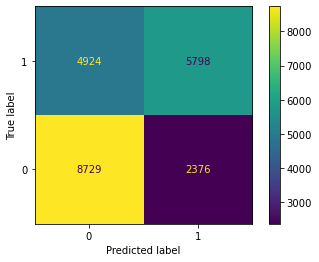

 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.79      0.71     11105
           1       0.71      0.54      0.61     10722

    accuracy                           0.67     21827
   macro avg       0.67      0.66      0.66     21827
weighted avg       0.67      0.67      0.66     21827

------------------------------------------------------------------


In [49]:
sgd_pred = sgd.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, sgd_pred)}")
print(" ")
cfm = confusion_matrix(y_test, sgd_pred)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
print("Confusion Matrix")
plt.show()
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, sgd_pred))
print('------------------------------------------------------------------')

## ANN MODEL

In [50]:
ann = Sequential()
ann.add(Dense(64, input_dim=len(X_train.columns), activation="relu"))
ann.add(Dense(32, activation="relu"))
ann.add(Dense(16, activation="relu"))
ann.add(Dense(1, activation="sigmoid"))
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = ann.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.30)

Epoch 1/20
1114/1114 [==============================] - 8s 5ms/step - loss: 0.6102 - accuracy: 0.6667 - val_loss: 0.5946 - val_accuracy: 0.6849
Epoch 2/20
1114/1114 [==============================] - 6s 5ms/step - loss: 0.5957 - accuracy: 0.6791 - val_loss: 0.5898 - val_accuracy: 0.6814
Epoch 3/20
1114/1114 [==============================] - 6s 6ms/step - loss: 0.5909 - accuracy: 0.6821 - val_loss: 0.5841 - val_accuracy: 0.6891
Epoch 4/20
1114/1114 [==============================] - 6s 5ms/step - loss: 0.5880 - accuracy: 0.6832 - val_loss: 0.5849 - val_accuracy: 0.6847
Epoch 5/20
1114/1114 [==============================] - 7s 6ms/step - loss: 0.5859 - accuracy: 0.6830 - val_loss: 0.5809 - val_accuracy: 0.6889
Epoch 6/20
1114/1114 [==============================] - 6s 5ms/step - loss: 0.5840 - accuracy: 0.6860 - val_loss: 0.5806 - val_accuracy: 0.6887
Epoch 7/20
1114/1114 [==============================] - 6s 6ms/step - loss: 0.5830 - accuracy: 0.6861 - val_loss: 0.5821 - val_accuracy:

683/683 [==============================] - 2s 2ms/step - loss: 0.5845 - accuracy: 0.6852
Confusion Matrix


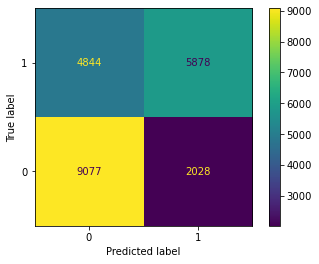

 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.65      0.82      0.73     11105
           1       0.74      0.55      0.63     10722

    accuracy                           0.69     21827
   macro avg       0.70      0.68      0.68     21827
weighted avg       0.70      0.69      0.68     21827

------------------------------------------------------------------


In [51]:
pred_ann = ann.predict(X_test)
preds_ann = (pred_ann > 0.5) * 1
scores = ann.evaluate(X_test, y_test, verbose=1)
cfm = confusion_matrix(y_test, preds_ann)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
print("Confusion Matrix")
plt.show()
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, preds_ann))
print('------------------------------------------------------------------')

In [52]:
# # Define models
# models_list = []
# models_list.append(('LR', LogisticRegression(random_state=1)))
# models_list.append(('DTC', DecisionTreeClassifier(random_state=1)))
# # models_list.append(('KNN', KNeighborsClassifier()))
# models_list.append(('GNB', GaussianNB()))
# # models_list.append(('SVM', SVC(kernel='linear', gamma='auto')))
# models_list.append(('RF', RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)))

In [53]:
# # Modelling and evaluation

# models = []
# outcomes = []

# for name, model in models_list:
#     kfold = ms.KFold(random_state=5, n_splits=10, shuffle=True)
#     cross_val = ms.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
#     model.fit(X_train, y_train)
#     pred = model.predict(X_test)
#     outcomes.append(cross_val)
#     models.append(name)
#     print(f"{name}: {cross_val.mean()} - {cross_val.std()}")
#     print(f"accuracy: {accuracy_score(y_test, pred)}")
#     combine = pd.DataFrame(dict(actual=y_test, prediction=pred))
#     print(' ')
#     print('confusion matrix')
#     print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
#     print(' ')
#     print('classification report')
#     print(classification_report(y_test, pred))
#     print(' ')
#     print('------------------------------------------------------------------')
#     print(' ')